# 1:Loading data

In [1]:
#from sklearn import preprocessing, cross_validation
import pandas 
from pandas import read_csv
import numpy as np
from matplotlib import style
style.use('ggplot')

#loading data
stroke = read_csv('stroke.csv')
#print(stroke)
data_temp = pandas.DataFrame(stroke, columns = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'])
target = pandas.DataFrame(stroke, columns = ['stroke'])
bmi = pandas.DataFrame(stroke, columns = ['bmi']) #storing feature bmi separately to be used for special imputation
data_temp


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


# 2: Data imputation

### 2.1: Delete id column

In [2]:

#deleting inappropriate columns
data_temp.drop('id', inplace=True, axis=1)
data_temp



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


## 2.2: Counting null values in every colum

In [3]:
print(data_temp.isnull().sum())
target.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
dtype: int64


stroke    0
dtype: int64

## 2.3: checking unique column values for non-numeric values

In [4]:
#checking unique column values
print("smoking_status values:", data_temp.smoking_status.unique())
print("gender values:", data_temp.gender.unique())
print("ever_married values:", data_temp.ever_married.unique())
print("work_type values:", data_temp.work_type.unique())
print("residence_type values:", data_temp.Residence_type.unique())
print("residence_type values:", data_temp.Residence_type.unique())
print("stroke:", target.stroke.unique())

smoking_status values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
gender values: ['Male' 'Female' 'Other']
ever_married values: ['Yes' 'No']
work_type values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
residence_type values: ['Urban' 'Rural']
residence_type values: ['Urban' 'Rural']
stroke: [1 0]


## 2.4: replacing null values with respective column mean for bmi column

In [5]:
#This code was commented since KNNImputer has been used for null values replacement in coming cells
'''bmi_mean = np.round(data["bmi"].mean(), 1)
   print(bmi_mean)
   data['bmi'].fillna(value=bmi_mean, inplace=True)'''
data_temp.drop('bmi', inplace=True, axis=1)#delete bmi temporarily before imputing categorical data

## 2.5: Dealing with non-numeric data

In [6]:
#replacing non-numeric column values with numeric values
def handle_non_numerical_data(data_temp):
    columns = data_temp.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if data_temp[column].dtype != np.int64 and data_temp[column].dtype != np.float64:
            column_contents = data_temp[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            data_temp[column] = list(map(convert_to_int, data_temp[column]))

    return data_temp

data_temp = handle_non_numerical_data(data_temp)
data_temp = pandas.concat([data_temp, bmi], axis = 1)#conatenating bmi column
data_temp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,bmi
0,0,67.0,0,1,1,2,0,228.69,3,36.6
1,2,61.0,0,0,1,0,1,202.21,1,NaN
2,0,80.0,0,1,1,2,1,105.92,1,32.5
3,2,49.0,0,0,1,2,0,171.23,0,34.4
4,2,79.0,1,0,1,0,1,174.12,1,24.0
...,...,...,...,...,...,...,...,...,...,...
5105,2,80.0,1,0,1,2,0,83.75,1,NaN
5106,2,81.0,0,0,1,0,0,125.20,1,40.0
5107,2,35.0,0,0,1,0,1,82.99,1,30.6
5108,0,51.0,0,0,1,2,1,166.29,3,25.6


## 2.6: Replacing null values using  KNNImputer

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
data2 = imputer.fit_transform(data_temp)
data = pandas.DataFrame(data2, columns = ['gender', 'age', 'hypertension', 'heart_disease', 
                                    'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status', 
                                    'bmi'])
print(data.isnull().sum())
target.isnull().sum()
data

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
bmi                  0
dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,bmi
0,0.0,67.0,0.0,1.0,1.0,2.0,0.0,228.69,3.0,36.60
1,2.0,61.0,0.0,0.0,1.0,0.0,1.0,202.21,1.0,38.80
2,0.0,80.0,0.0,1.0,1.0,2.0,1.0,105.92,1.0,32.50
3,2.0,49.0,0.0,0.0,1.0,2.0,0.0,171.23,0.0,34.40
4,2.0,79.0,1.0,0.0,1.0,0.0,1.0,174.12,1.0,24.00
...,...,...,...,...,...,...,...,...,...,...
5105,2.0,80.0,1.0,0.0,1.0,2.0,0.0,83.75,1.0,26.85
5106,2.0,81.0,0.0,0.0,1.0,0.0,0.0,125.20,1.0,40.00
5107,2.0,35.0,0.0,0.0,1.0,0.0,1.0,82.99,1.0,30.60
5108,0.0,51.0,0.0,0.0,1.0,2.0,1.0,166.29,3.0,25.60


## 2.7:Checking statistical properties of data

In [8]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.00000
mean,1.172016,43.226614,0.097456,0.054012,0.656164,1.824070,0.491977,106.147677,1.494129,28.94910
std,0.985091,22.612647,0.296607,0.226063,0.475034,1.131831,0.499985,45.283560,0.951488,7.80785
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,0.000000,10.30000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.245000,1.000000,23.60000
50%,2.000000,45.000000,0.000000,0.000000,1.000000,2.000000,0.000000,91.885000,1.000000,28.10000
75%,2.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,2.000000,33.10000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,3.000000,97.60000


## 2.8: Checking class distribution

In [9]:
dataset = pandas.concat([data, target], axis = 1)
dataset.groupby(['stroke']).size()

stroke
0    4861
1     249
dtype: int64

## 2.9: Oversampling data and rechecking class distribution

In [10]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=0)

data1, target1 = ros.fit_resample(data, target)
target1.groupby(['stroke']).size()

stroke
0    4861
1    4861
dtype: int64

## 2.10: Normalising data in range 0 to 1

In [11]:

data1 = ((data1-data1.min())/(data1.max()-data1.min()))
dataset = pandas.concat([data1, target1], axis = 1)

dataset1 = pandas.concat([data, target], axis = 1)
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,bmi,stroke
count,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000
mean,0.570716,0.669828,0.179490,0.119420,0.765995,0.401409,0.472845,0.292771,0.513612,0.220501,0.500000
std,0.494973,0.271123,0.383782,0.324299,0.423397,0.261968,0.499288,0.254804,0.336699,0.080253,0.500026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.499512,0.000000,0.000000,1.000000,0.250000,0.000000,0.106454,0.333333,0.168385,0.000000
50%,1.000000,0.719238,0.000000,0.000000,1.000000,0.500000,0.000000,0.192618,0.333333,0.210481,0.500000
75%,1.000000,0.902344,0.000000,0.000000,1.000000,0.500000,1.000000,0.414458,0.666667,0.262314,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.11: Plotting data distribution with two features

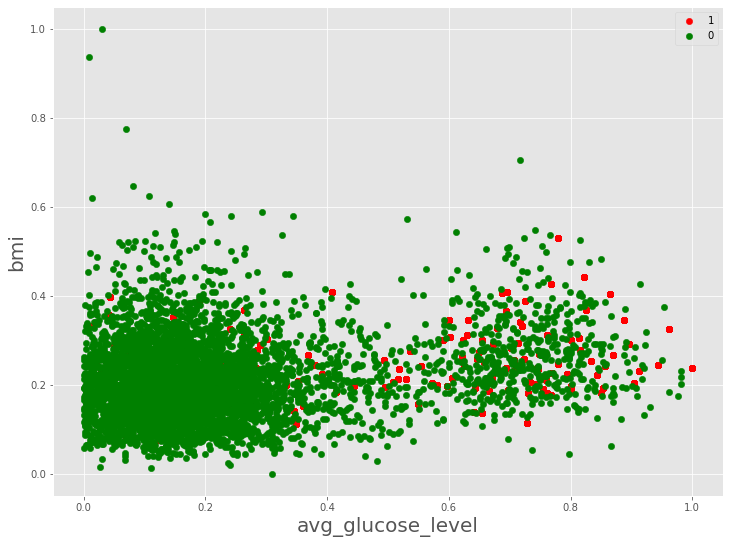

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 9]

colors = ['r', 'g', 'b']

for i, item in enumerate(dataset["stroke"].unique()):
    sub_data = dataset.loc[dataset['stroke'] == item]
    plt.scatter(sub_data["avg_glucose_level"], sub_data["bmi"], color=colors[i], s= 40, label=item)
    
    
plt.xlabel('avg_glucose_level',fontsize=20)
plt.ylabel('bmi', fontsize=20)
plt.legend()
plt.show()

## 2.12: Shuffling data, and replotting data with two features

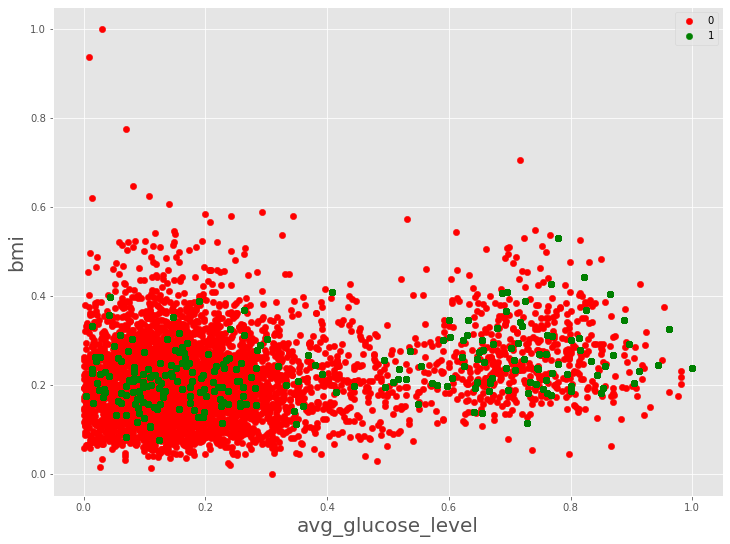

In [13]:
dataset = dataset.sample(frac=1)
#dataset.sample(20)

data1 = dataset[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
target1 = dataset[['stroke']]

#plotting
for i, item in enumerate(dataset["stroke"].unique()):
    sub_data = dataset.loc[dataset['stroke'] == item]
    plt.scatter(sub_data["avg_glucose_level"], sub_data["bmi"], color=colors[i], s= 40, label=item)
    
    
plt.xlabel('avg_glucose_level',fontsize=20)
plt.ylabel('bmi', fontsize=20)
plt.legend()
plt.show()

### 2.13: Plotting class distribution in respect to every pair of features

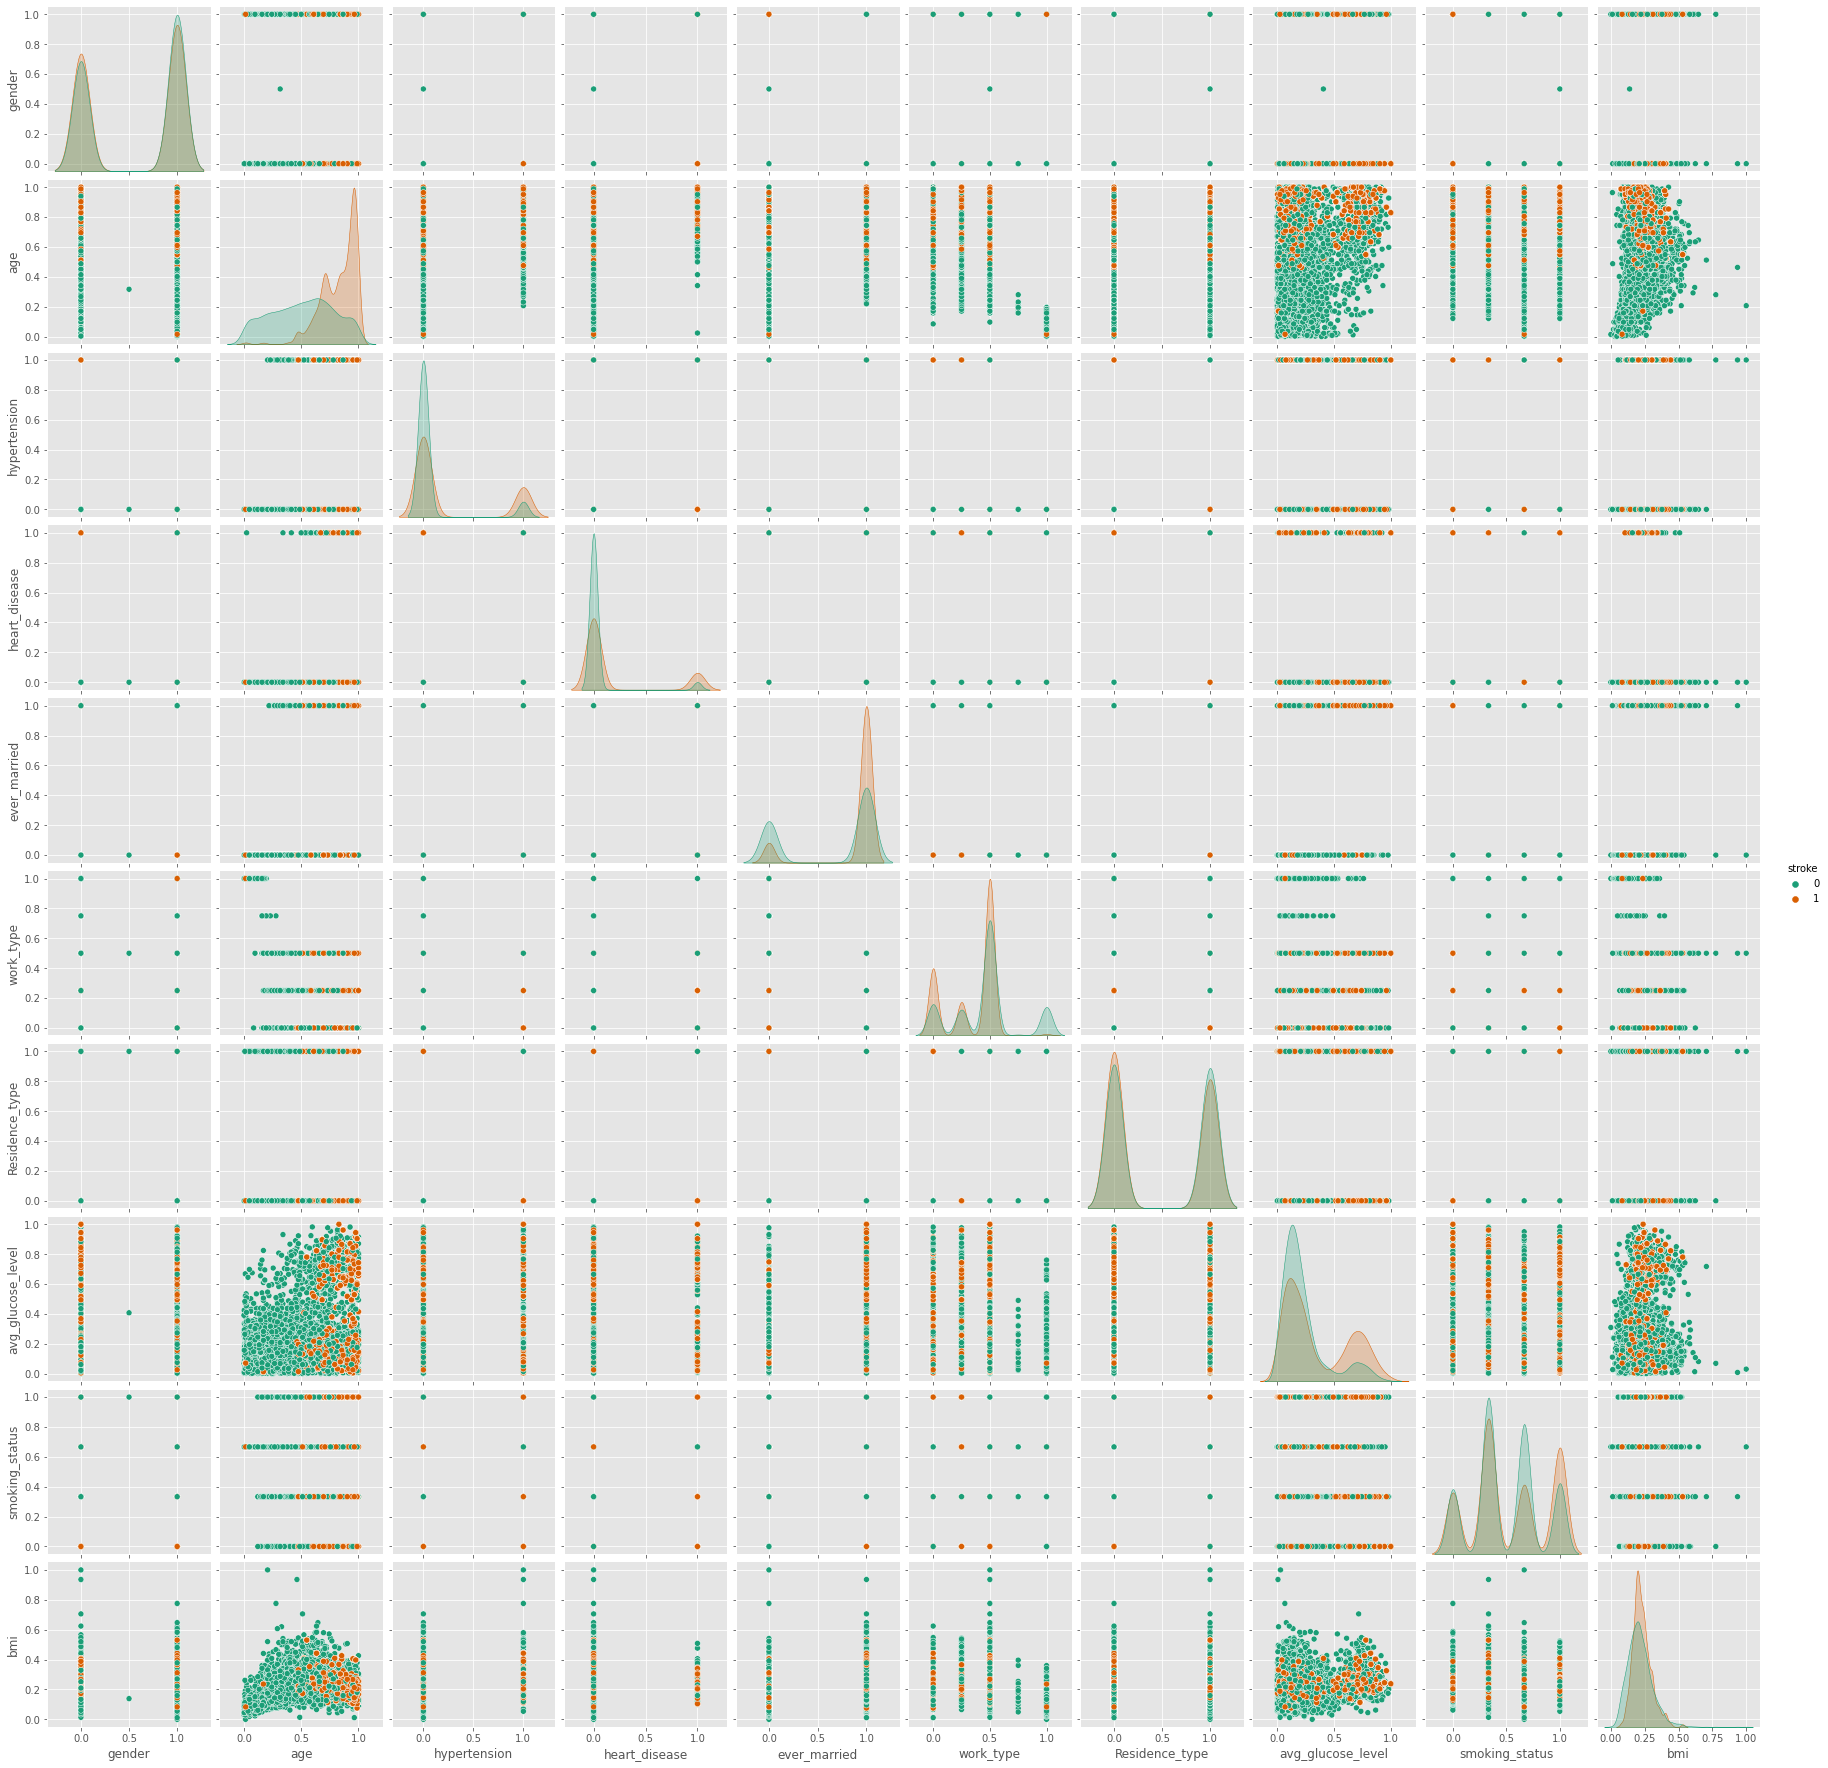

In [14]:
import seaborn as sns
sns.pairplot(dataset, hue='stroke',palette='Dark2')


# 4: split dataset into train and test sets

In [16]:
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = model_selection.train_test_split(np.array(data1), np.array(target1), test_size=0.20, random_state=7)

#printing splitting results
print(X_train.shape[0])
print(X_test.shape[0])
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)


7777
1945
[[  0 958]
 [  1 987]]
[[   0 3903]
 [   1 3874]]


# 5: Building models

In [17]:
#importing generak models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

## 5.1 SVM

### 5.1.1: Tuning hyperparameters with grid search and KFold cross validation

In [18]:
from sklearn.svm import SVC

# manual nested cross-validation for SVM
#commented because it takes long to run
'''from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

X = data1.to_numpy()
y = target1.to_numpy()
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X_train):
    # split data
    X_train1, X_test1 = X[train_ix, :], X[test_ix, :]
    y_train1, y_test1 = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = SVC()
    # define search space
    space = dict()
    space['C'] = [0.1, 1, 10, 100, 1000]
    space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
    space['kernel'] = ['rbf', 'poly', 'sigmoid', 'linear']
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train1, y_train1.ravel())
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test1)
    # evaluate the model
    acc = accuracy_score(y_test1, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))'''

"from numpy import mean\nfrom numpy import std\nfrom sklearn.model_selection import KFold\nfrom sklearn.metrics import accuracy_score\n\nX = data1.to_numpy()\ny = target1.to_numpy()\ncv_outer = KFold(n_splits=10, shuffle=True, random_state=1)\n# enumerate splits\nouter_results = list()\nfor train_ix, test_ix in cv_outer.split(X_train):\n    # split data\n    X_train1, X_test1 = X[train_ix, :], X[test_ix, :]\n    y_train1, y_test1 = y[train_ix], y[test_ix]\n    # configure the cross-validation procedure\n    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)\n    # define the model\n    model = SVC()\n    # define search space\n    space = dict()\n    space['C'] = [0.1, 1, 10, 100, 1000]\n    space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]\n    space['kernel'] = ['rbf', 'poly', 'sigmoid', 'linear']\n    # define search\n    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)\n    # execute search\n    result = search.fit(X_train1, y_train1.ravel())\n 

### 5.1.2 Grid search for rbf kernel

In [19]:
#commented because it takes long to run
'''param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train.ravel())

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)'''


"param_grid = {'C': [0.1, 1, 10, 100, 1000],\n              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],\n              'kernel': ['rbf']}\n \ngrid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)\n \n# fitting the model for grid search\ngrid.fit(X_train, y_train.ravel())\n\n# print best parameter after tuning\nprint(grid.best_params_)\n \n# print how our model looks after hyper-parameter tuning\nprint(grid.best_estimator_)"

### 5.1.2: Grid search for sigmoid kernel

In [20]:
#commented because it takes long to run
'''param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train.ravel())

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)'''

"param_grid = {'C': [0.1, 1, 10, 100, 1000],\n              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],\n              'kernel': ['sigmoid']}\n \ngrid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)\n \n# fitting the model for grid search\ngrid.fit(X_train, y_train.ravel())\n\n# print best parameter after tuning\nprint(grid.best_params_)\n \n# print how our model looks after hyper-parameter tuning\nprint(grid.best_estimator_)"

### 5.1.3: Grid search for linear function

In [21]:
#commented because it takes long to run
'''param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train.ravel())

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)'''

"param_grid = {'C': [0.1, 1, 10, 100, 1000],\n              'kernel': ['linear']}\n \ngrid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)\n \n# fitting the model for grid search\ngrid.fit(X_train, y_train.ravel())\n\n# print best parameter after tuning\nprint(grid.best_params_)\n \n# print how our model looks after hyper-parameter tuning\nprint(grid.best_estimator_)"

### 5.1.4: Grid search for polynomial kernel

In [22]:
#commented because it takes long to run
'''param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [2, 3, 5],
              'kernel': ['poly']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train.ravel())

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)'''

"param_grid = {'C': [0.1, 1, 10, 100, 1000],\n              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],\n              'degree': [2, 3, 5],\n              'kernel': ['poly']}\n \ngrid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)\n \n# fitting the model for grid search\ngrid.fit(X_train, y_train.ravel())\n\n# print best parameter after tuning\nprint(grid.best_params_)\n \n# print how our model looks after hyper-parameter tuning\nprint(grid.best_estimator_)"

### 5.1.5: Implementing SVM with Grid results for  all kernel functions and linear function

In [36]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=3, gamma=1, C=1)
    
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma=1, C=1000)
    
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma=0.1, C=1)
    
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto", C=0.1)
    
for i in range(4):
    svclassifier = getClassifier(i) 
    y_train1 = y_train.ravel()
    
    start = timeit.default_timer() #record time before fitting  model
    svclassifier.fit(X_train, y_train1)# Make prediction
    end = timeit.default_timer()#record time after convergence
        
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))
    print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
    print("Convergence time: ", end-start)
    print()
    

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       958
           1       0.80      0.85      0.82       987

    accuracy                           0.82      1945
   macro avg       0.82      0.82      0.82      1945
weighted avg       0.82      0.82      0.82      1945

Confusion matrix:  [[751 207]
 [151 836]]
Convergence time:  10.387030999999752

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       958
           1       0.88      0.98      0.92       987

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945

Confusion matrix:  [[824 134]
 [ 24 963]]
Convergence time:  30.698687699999937

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      

## 5.2: Logistic regression

### 5.2.1: Grid search for liblinear solver

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['liblinear']
space['penalty'] = ['l1', 'l2']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# define grid search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train, y_train.ravel())

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7784462574951007
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


### 5.2.2: Grid search for newton-cg solver

In [25]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg']
space['penalty'] = ['none', 'l2']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train, y_train.ravel())

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7786178576667008
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


### 5.2.3: Grid search for lbfgs solver

In [26]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = [ 'lbfgs']
space['penalty'] = ['none', 'l2']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train, y_train.ravel())

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7786178576667008
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


### 5.2.4: Grid search for saga solver

In [27]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = [ 'saga']
space['penalty'] = ['none', 'l2', 'l1']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train, y_train.ravel())

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7784462574951004
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


### 5.2.5: Implementing Logistic Regression with Grid search results for all solvers

In [28]:
solvers = ['newton-cg', 'lbfgs', 'liblinear','saga']#A function which returns the corresponding SVC model
def getClassifier(stype):
    if stype == 0:
        # newton-cg solver
        return LogisticRegression(C=0.1, penalty="l2", solver="newton-cg")
    
    elif stype == 1:
        # lbfgs solver
        return LogisticRegression(C=0.1, penalty="l2", solver="lbfgs")
    
    elif stype == 2:
        # liblinear solver
        return LogisticRegression(C=0.01, penalty="l1", solver="liblinear")
    
    elif stype == 3:
        # saga solver
        return LogisticRegression(C=0.1, penalty="l1", solver="saga")
    
for i in range(4):
    lgclassifier = getClassifier(i) 
    y_train1 = y_train.ravel()
    
    start = timeit.default_timer() #record time before fitting  model
    lgclassifier.fit(X_train, y_train1)# Make prediction
    end = timeit.default_timer()#record time after convergence
    
    y_pred = lgclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", solvers[i], "solver")
    print(classification_report(y_test,y_pred))
    print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
    print("Convergence time: ", end-start)
    print()
    

Evaluation: newton-cg solver
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       958
           1       0.76      0.82      0.79       987

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945

Confusion matrix:  [[704 254]
 [179 808]]
Convergence time:  0.06975189999999998

Evaluation: lbfgs solver
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       958
           1       0.76      0.82      0.79       987

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945

Confusion matrix:  [[704 254]
 [179 808]]
Convergence time:  0.04372219999999061

Evaluation: liblinear solver
              precision    recall  f1-score   support

           0       0.83      0.69      0.75 

## 5.3: Neural Networks

### 5.3.1:  implementing NN with activation:tanh, solver:sgd

In [29]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(20,20,20), activation='tanh', solver='sgd', alpha=0.001, batch_size=10, max_iter = 1000)

start = timeit.default_timer() #record time before fitting  model
nn.fit(X_train, y_train.ravel())
end = timeit.default_timer()#record time after convergence

y_pred = nn.predict(X_test)

print("Evaluation: sgd and tanh")
print(classification_report(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("Convergence time: ", end-start)
print()

Evaluation: sgd and tanh
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       958
           1       0.92      0.99      0.95       987

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945

Confusion matrix:  [[867  91]
 [  7 980]]
Convergence time:  409.99213380000003



### 5.3.2:  implementing NN with activation:relu, solver:adam 

In [30]:
nn = MLPClassifier(hidden_layer_sizes=(20,20,20), activation='relu', solver='adam', alpha=0.001, batch_size =10, max_iter = 1000)

start = timeit.default_timer() #record time before fitting  model
nn.fit(X_train, y_train.ravel())
end = timeit.default_timer()#record time after convergence

y_pred = nn.predict(X_test)

print("Evaluation: relu and adam")
print(classification_report(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("Convergence time: ", end-start)
print()

Evaluation: relu and adam
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       958
           1       0.89      0.97      0.93       987

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945

Confusion matrix:  [[844 114]
 [ 26 961]]
Convergence time:  190.49806209999997



### 5.3.3: implementing NN with activation:tanh, solver:adam 

In [31]:
nn = MLPClassifier(hidden_layer_sizes=(20,20, 20), activation='tanh', solver='adam', alpha=0.001, batch_size=10, max_iter = 1000)


start = timeit.default_timer() #record time before fitting  model
nn.fit(X_train, y_train.ravel())
end = timeit.default_timer()#record time after convergence

y_pred = nn.predict(X_test)
print("Evaluation: adam and tanh")
print(classification_report(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("Convergence time: ", end-start)
print()

Evaluation: adam and tanh
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       958
           1       0.94      1.00      0.97       987

    accuracy                           0.96      1945
   macro avg       0.97      0.96      0.96      1945
weighted avg       0.97      0.96      0.96      1945

Confusion matrix:  [[890  68]
 [  2 985]]
Convergence time:  280.81869470000004



### 5.3.4:implementing NN with activation:relu, solver:sgd 

In [32]:
nn = MLPClassifier(hidden_layer_sizes=(20,20, 20), activation='relu', solver='sgd', alpha=0.001, batch_size=10, max_iter = 1000)


start = timeit.default_timer() #record time before fitting  model
nn.fit(X_train, y_train.ravel())
end = timeit.default_timer()#record time after convergence

y_pred = nn.predict(X_test)
print("Evaluation: adam and tanh")
print(classification_report(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("Convergence time: ", end-start)
print()

Evaluation: adam and tanh
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       958
           1       0.86      0.94      0.90       987

    accuracy                           0.89      1945
   macro avg       0.89      0.89      0.89      1945
weighted avg       0.89      0.89      0.89      1945

Confusion matrix:  [[808 150]
 [ 62 925]]
Convergence time:  249.4545023999999



## 5.4: Random forests

### 5.4.1: Grid search with KFold cross validation for random forests

In [33]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
X = data1.to_numpy()
y = target1.to_numpy()
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X_train):
    # split data
    X_train1, X_test1 = X[train_ix, :], X[test_ix, :]
    y_train1, y_test1 = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = RandomForestClassifier(random_state=1)
    # define search space
    space = dict()
    space['n_estimators'] = [10, 100, 500]
    space['max_depth']    = [10, 20, 30, 40]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train1, y_train1.ravel())
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test1)
    # evaluate the model
    acc = accuracy_score(y_test1, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))


NameError: name 'RandomForestClassifier' is not defined

### 5.4.2: implemeting random forests with max depth: 10, criterion:entropy

In [ ]:
#implemeting random forests with max_depth 10 and criterion entropy
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=7, max_features='auto', n_estimators= 100, max_depth=10, criterion='entropy')

start = timeit.default_timer() #record time before fitting  model
rfc.fit(X_train, y_train.ravel())
end = timeit.default_timer()#record time after convergence

y_pred = rfc.predict(X_test)
print("Evaluation: max_depth:10, entropy")
print(classification_report(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("Convergence time: ", end-start)
print()

### 5.4.3: implemeting random forests with max depth: 10, criterion:gini

In [ ]:
#implemeting random forests with max_depth 10 and criterion gini
rfc=RandomForestClassifier(random_state=7, max_features='auto', n_estimators= 100, max_depth=10, criterion='gini')

start = timeit.default_timer() #record time before fitting  model
rfc.fit(X_train, y_train.ravel())
end = timeit.default_timer()#record time after convergence

y_pred = rfc.predict(X_test)
print("Evaluation: max_depth=10, gini")
print(classification_report(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("Convergence time: ", end-start)
print()

### 5.4.4: implemeting random forests with max depth: 30, criterion:entropy

In [ ]:
rfc=RandomForestClassifier(random_state=7, max_features='auto', n_estimators= 100, max_depth=30, criterion='entropy')

start = timeit.default_timer() #record time before fitting  model
rfc.fit(X_train, y_train.ravel())
end = timeit.default_timer()#record time after convergence

y_pred = rfc.predict(X_test)
print("Evaluation: max_depth=30, entropy")
print(classification_report(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("Convergence time: ", end-start)
print()


### 5.4.5: implemeting random forests with max depth: 30, criterion:entropy

In [ ]:
rfc=RandomForestClassifier(random_state=7, max_features='auto', n_estimators= 100, max_depth=30, criterion='gini')

start = timeit.default_timer() #record time before fitting  model
rfc.fit(X_train, y_train.ravel())
end = timeit.default_timer()#record time after convergence

y_pred = rfc.predict(X_test)
print("Evaluation: max_depth=30, gini")
print(classification_report(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("Convergence time: ", end-start)
print()
